# Actividad 7: Swarm particle optimization

## Estudiantes
Tom Arc, <br>
Alejandro Hermosillo, <br>
Mauricio Flores <br>

## Importación de librerías

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

sns.set_style("darkgrid")

## Definición de Clase partícula

La clase partícula representa una partícula, la cual tiene posición, velocidad y la mejor posición que se ha encontrado. Además la clase tiene métodos para actualizar su velocidad y su posición. 

In [2]:
class Particle():

  def __init__(self, pos, vel):
    self.pos = pos
    self.vel = vel
    self.best_pos = pos


  def update_velocity(self, c1, c2, inertia, best_neighbor, max_vel, verbose = False):
    for i in range(len(self.vel)):
      r1 = np.random.uniform()
      r2 = np.random.uniform()

      if verbose == True:
        print(f'Número aleatoria r1: {r1}')
        print(f'Número aleatoria r2: {r2}')

      self.vel[i] = inertia*self.vel[i] + c1*r1*(self.best_pos[i] - self.pos[i]) + c2*r2*(best_neighbor[i] - self.pos[i])

      if self.vel[i] > max_vel:
        self.vel[i] = max_vel
      elif self.vel[i] < -max_vel:
        self.vel[i] = -max_vel

  def update_position(self, bounds):
    self.pos = self.pos + self.vel

    for i in range(len(self.pos)):
      if self.pos[i] > bounds[i][1]:
        self.pos[i] = bounds[i][1] - abs(self.pos[i] - bounds[i][1])
        self.vel[i] *= -1
      elif self.pos[i] < bounds[i][0]:
        self.pos[i] = bounds[i][0] + abs(self.pos[i] - bounds[i][0])
        self.vel[i] *= -1

## Definición de funciones

Función que crea un conjunto de partículas con posiciones aleatorias

In [3]:
def create_random_particles(ndim, lim, n):
  particles = []
  for i in range(n):
    pos = []
    for j in range(ndim):
      tmp = random.randint(lim[j][0], lim[j][1])
      pos.append(tmp)
    vel = np.zeros(ndim)
    particle = Particle(np.array(pos), np.array(vel))
    particles.append(particle)

  return particles

Función que simula el movimiento de las partículas siguiendo la heurística de "particle swarm optimization". Esta función recibe el número de partículas a simular y el número de iteraciones.

In [4]:
def simulation(n_iterations,  n_particles, lim, function, n_neighbors, c1, c2, w, max_vel, min_w = 0, verbose = False):
  """Implements the Particle Swarm Optimization heuristic"""
  ndim = len(lim)
  diff_inertia = (w - min_w)/n_iterations

  # Generate random initial particles
  particles = create_random_particles(ndim, lim, n_particles)
  best_global = particles[0].pos
  for i in range(n_iterations):
    w -= diff_inertia

    # Print position of particles
    if verbose == True:
      print(f'Posicion de las particulas en la iteracion [{i}]')
      
      for j in range(n_particles):
        print(f'Posicion de particula [{j}]: {particles[j].pos}')

    for j in range(n_particles):

      # Search for best neighbor
      best_neighbor = particles[j].best_pos
      neighbor_left = n_neighbors//2
      start = (j-neighbor_left)%n_particles
      for z in range(0, n_neighbors+1):
        if function(particles[(start+z)%n_particles].best_pos) < function(best_neighbor):
          best_neighbor = np.copy(particles[(start+z)%n_particles].best_pos)

      if verbose == True:
        print(f'Generacion de números aleatorios para la partícula [{j}] y la iteracion [{i}]')
      particles[j].update_velocity(c1, c2, w, best_neighbor, max_vel, verbose)
      particles[j].update_position(lim)

      if function(particles[j].pos) < function(particles[j].best_pos):
        particles[j].best_pos = np.copy(particles[j].pos)

        if function(particles[j].best_pos) < function(best_global):
          best_global = np.copy(particles[j].best_pos)

  return best_global, particles

Función para graficar y mostrar una solución. La gráfica muestra la ubicación de las partículas sobre la función que se intenta minimizar. 

In [5]:
def print_solution(xlim, function, best, particles):
  print(f'La mejor solucion es: {best} con un mínimo de: {function(best)}')
  x = np.arange(xlim[0], xlim[1], 0.01)
  y = function(x)
  sns.lineplot(x = x, y = y)

  for particle in particles:
    sns.scatterplot(x = particle.pos, y = function(particle.pos))

  plt.title('Minimización de función con PSO')
  plt.xlabel('x')
  plt.ylabel('x*sin(x)/2+10')
  plt.show()

## Código principal

Configuración del problema

**Función a minimizar**

In [6]:
def fitness_function(x):
  return x*np.sin(x)/2+10

**Gráfica de la función a minimizar**


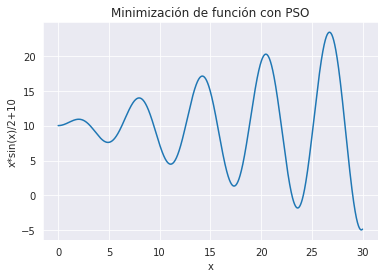

In [7]:
x = np.arange(0, 30, 0.001)
y = fitness_function(x)

sns.lineplot(x = x, y = y)
plt.title('Minimización de función con PSO')
plt.xlabel('x')
plt.ylabel('x*sin(x)/2+10')
plt.show()

### Simulación para resolver la actividad

**a)** Ejecute  dos  ciclos  completos  de  un  sistema  de  Optimización  de  Enjambre  de Partículas  intentando  MINIMIZAR  la  función  no  lineal  que  se  ilustra  abajo.  El  ciclo termina cuando se calcula la nueva posición de cada partícula.

In [8]:
best, particles = simulation(
    n_iterations = 2, 
    n_particles = 5, 
    lim = [(0, 30)], 
    function = fitness_function, 
    n_neighbors = 3, 
    c1 = 2, 
    c2 = 2, 
    w = 5, 
    max_vel = 2, 
    min_w = 0.4,
    verbose = True)

Posicion de las particulas en la iteracion [0]
Posicion de particula [0]: [19]
Posicion de particula [1]: [10]
Posicion de particula [2]: [22]
Posicion de particula [3]: [9]
Posicion de particula [4]: [9]
Generacion de números aleatorios para la partícula [0] y la iteracion [0]
Número aleatoria r1: 0.3997892674583087
Número aleatoria r2: 0.6728955205507554
Generacion de números aleatorios para la partícula [1] y la iteracion [0]
Número aleatoria r1: 0.43670215925746747
Número aleatoria r2: 0.785789043606684
Generacion de números aleatorios para la partícula [2] y la iteracion [0]
Número aleatoria r1: 0.35418679603075254
Número aleatoria r2: 0.01992306159973445
Generacion de números aleatorios para la partícula [3] y la iteracion [0]
Número aleatoria r1: 0.6261467414303914
Número aleatoria r2: 0.5137608817783215
Generacion de números aleatorios para la partícula [4] y la iteracion [0]
Número aleatoria r1: 0.9226862303310038
Número aleatoria r2: 0.8349894864991506
Posicion de las particu

**b)** Simule  un  PSO  con  n  =  5  partículas  con  vecindarios  circulares  de  tamaño  3  y  una velocidad máxima (VMAX) de 2. 

Simulación de un PSO con 2 iteraciones, 5 partículas, vecindarios circulares de tamaño 3, velocidad máxima de 2 y un espacio de búsqueda de 0 a 30 para la variable x. Además con hiperparámetros: c1 = 2, c2 = 2 y w = 5. 

In [9]:
best, particles = simulation(
    n_iterations = 2, 
    n_particles = 5, 
    lim = [(0, 30)], 
    function = fitness_function, 
    n_neighbors = 3, 
    c1 = 2, 
    c2 = 2, 
    w = 5, 
    max_vel = 2, 
    min_w = 0.4,
    verbose = True)

Posicion de las particulas en la iteracion [0]
Posicion de particula [0]: [2]
Posicion de particula [1]: [2]
Posicion de particula [2]: [7]
Posicion de particula [3]: [26]
Posicion de particula [4]: [1]
Generacion de números aleatorios para la partícula [0] y la iteracion [0]
Número aleatoria r1: 0.2010538385227152
Número aleatoria r2: 0.32668519555706654
Generacion de números aleatorios para la partícula [1] y la iteracion [0]
Número aleatoria r1: 0.5773649573680306
Número aleatoria r2: 0.4163096612506816
Generacion de números aleatorios para la partícula [2] y la iteracion [0]
Número aleatoria r1: 0.20014732007660563
Número aleatoria r2: 0.909592817696264
Generacion de números aleatorios para la partícula [3] y la iteracion [0]
Número aleatoria r1: 0.2940708017793502
Número aleatoria r2: 0.707002872139817
Generacion de números aleatorios para la partícula [4] y la iteracion [0]
Número aleatoria r1: 0.15397429085510828
Número aleatoria r2: 0.8236841563733166
Posicion de las particulas

**Resultados de la ejecución de la simulación**

La mejor solucion es: [24.] con un mínimo de: [-0.86694034]


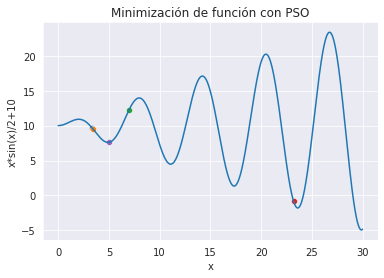

In [10]:
print_solution((0, 30), fitness_function, best, particles)

Al ejecutar varias veces la simulación con los mismos parámetros, se notó que en varias ocasiones se llegó a un muy buen óptimo global, sin embargo también hubo muchos otros casos en donde solo se obtuvieron buenas soluciones locales. Estos se puede atribuir a que el número de ciclos utilizado fue muy pequeño(2) y a que el número de partículas también fue muy pequeño(5)

### Simulación de un PSO utilizando los mismo parámetros, pero aumentando el número de partículas para diferente número de iteraciones. 

**10 Iteraciones y 20 partículas**

La mejor solucion es: [23.60548709] con un mínimo de: [-1.79155677]


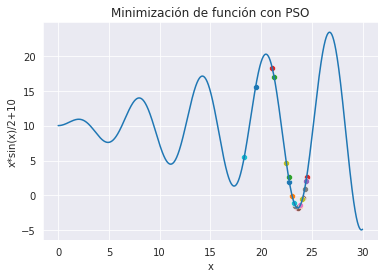

In [11]:
best, particles = simulation(
    n_iterations = 10, 
    n_particles = 20, 
    lim = [(0, 30)], 
    function = fitness_function, 
    n_neighbors = 5, 
    c1 = 2, 
    c2 = 2, 
    w = 5, 
    max_vel = 2, 
    min_w = 0.4)
print_solution((0, 30), fitness_function, best, particles)

**20 Iteraciones y 20 partículas**

La mejor solucion es: [29.88170442] con un mínimo de: [-4.93086034]


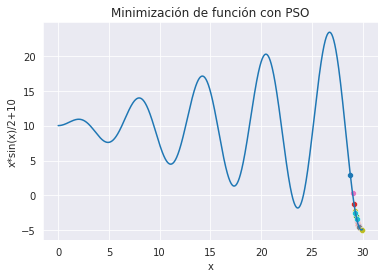

In [12]:
best, particles = simulation(
    n_iterations = 50, 
    n_particles = 20, 
    lim = [(0, 30)], 
    function = fitness_function, 
    n_neighbors = 5, 
    c1 = 2, 
    c2 = 2, 
    w = 5, 
    max_vel = 2, 
    min_w = 0.4)
print_solution((0, 30), fitness_function, best, particles)

**100 Iteraciones y 20 partículas**

La mejor solucion es: [29.87535447] con un mínimo de: [-4.93085493]


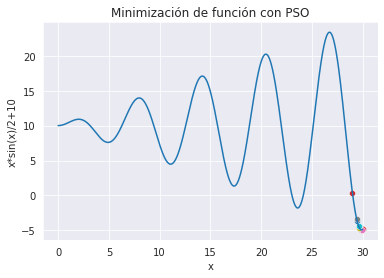

In [13]:
best, particles = simulation(
    n_iterations = 100, 
    n_particles = 20, 
    lim = [(0, 30)], 
    function = fitness_function, 
    n_neighbors = 5, 
    c1 = 2, 
    c2 = 2, 
    w = 5, 
    max_vel = 2, 
    min_w = 0.4)
print_solution((0, 30), fitness_function, best, particles)

**500 Iteraciones y 20 partículas**

La mejor solucion es: [29.87858541] con un mínimo de: [-4.93093308]


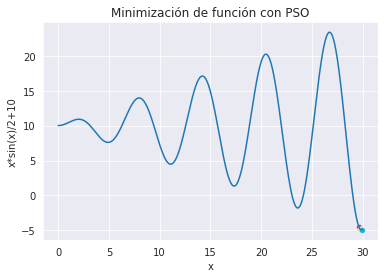

In [14]:
best, particles = simulation(
    n_iterations = 500, 
    n_particles = 20, 
    lim = [(0, 30)], 
    function = fitness_function, 
    n_neighbors = 5, 
    c1 = 2, 
    c2 = 2, 
    w = 5, 
    max_vel = 2, 
    min_w = 0.4)
print_solution((0, 30), fitness_function, best, particles)

Como se puede observar. Entre mayor es el número de iteraciones, las partículas convergen a un solo punto. En este caso convergen al punto que es un mínimo global para esta gráfica y para este rango. 